# Rede Neural com Tensorflow - classificação
- O objetivo desta tarefa é utilizar o mesmo código fonte, porém, para classificar imagens de gatos e cachorros.

### Bibliotecas

In [1]:
# Libs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from arquvoZip import descompactar

### Base de Dados

In [2]:
pathZip = r'C:\IA_e_Machine_Learning\1.1-Redes_neurais_artificias_e_Deep_learning\data\dataset_gato_cachorro.zip'
pathDest = r'C:\IA_e_Machine_Learning\1.1-Redes_neurais_artificias_e_Deep_learning\data\dataset_gato_cachorro'
descompactar(pathZip, pathDest)

### Visualizando as imagens

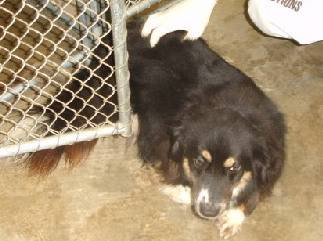

In [3]:
# Imagem de cachorro
tf.keras.preprocessing.image.load_img('../data/dataset_gato_cachorro/dataset/training_set/cachorro/dog.1007.jpg')

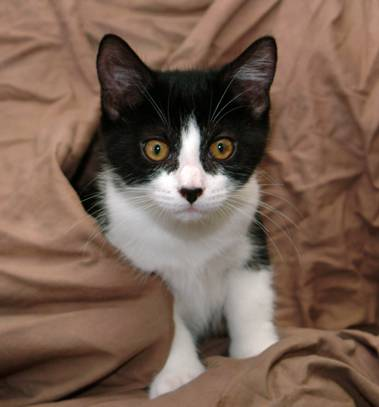

In [4]:
# Imagem de gato
tf.keras.preprocessing.image.load_img('../data/dataset_gato_cachorro/dataset/training_set/gato/cat.1002.jpg')

### Criando o gerador de Treinamento

In [5]:
# Gerar mais imagem se a base de dados for pequena
gerador_treinamento = ImageDataGenerator(
    rescale=1./255,
    rotation_range=7,
    horizontal_flip=True,
    shear_range = 0.2,
    zoom_range=0.2
)
base_treinamento = gerador_treinamento.flow_from_directory(
    r'C:\IA_e_Machine_Learning\1.1-Redes_neurais_artificias_e_Deep_learning\data\dataset_gato_cachorro\dataset\training_set',
    target_size = (64, 64),
    batch_size = 64,
    class_mode = 'binary'
)

Found 4000 images belonging to 2 classes.


In [6]:
# Visualizando as classes
base_treinamento.classes

array([0, 0, 0, ..., 1, 1, 1])

In [7]:
# Visualizando as classes
base_treinamento.class_indices

{'cachorro': 0, 'gato': 1}

### Criando o gerador de Teste

In [8]:
# Gerar mais imagem se a base de dados for pequena
gerador_teste = ImageDataGenerator(
    rescale=1./255
)
base_teste = gerador_teste.flow_from_directory(
    r'C:\IA_e_Machine_Learning\1.1-Redes_neurais_artificias_e_Deep_learning\data\dataset_gato_cachorro\dataset\test_set',
    target_size = (64, 64),
    batch_size = 64,
    class_mode = 'binary',
    shuffle = False
)

Found 1000 images belonging to 2 classes.


### Construção e treinamento da rede neural

In [9]:
# estrutura Rede neural
rede_neural = Sequential()
rede_neural.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation='relu'))
rede_neural.add(MaxPooling2D(pool_size=(2,2)))

rede_neural.add(Conv2D(32, (3,3), activation='relu'))
rede_neural.add(MaxPooling2D(pool_size=(2,2)))

rede_neural.add(Flatten())

rede_neural.add(Dense(units = 128, activation='relu'))
rede_neural.add(Dense(units = 128, activation='relu'))
rede_neural.add(Dense(units = 1, activation='sigmoid'))

In [10]:
# Compilando a rede neural
rede_neural.compile(
    optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy']
)

In [11]:
# Treinado a rede neural
rede_neural.fit(base_treinamento, epochs=10, validation_data=base_teste)

Epoch 1/10
63/63 [==============================] - 46s 704ms/step - loss: 0.6894 - accuracy: 0.5368 - val_loss: 0.6735 - val_accuracy: 0.5960
Epoch 2/10
63/63 [==============================] - 20s 318ms/step - loss: 0.6611 - accuracy: 0.6130 - val_loss: 0.6541 - val_accuracy: 0.6280
Epoch 3/10
63/63 [==============================] - 22s 348ms/step - loss: 0.6356 - accuracy: 0.6373 - val_loss: 0.6366 - val_accuracy: 0.6330
Epoch 4/10
63/63 [==============================] - 21s 336ms/step - loss: 0.6099 - accuracy: 0.6705 - val_loss: 0.6593 - val_accuracy: 0.6120
Epoch 5/10
63/63 [==============================] - 21s 337ms/step - loss: 0.6008 - accuracy: 0.6855 - val_loss: 0.6169 - val_accuracy: 0.6670
Epoch 6/10
63/63 [==============================] - 21s 338ms/step - loss: 0.5729 - accuracy: 0.6898 - val_loss: 0.5856 - val_accuracy: 0.6860
Epoch 7/10
63/63 [==============================] - 21s 340ms/step - loss: 0.5411 - accuracy: 0.7245 - val_loss: 0.6131 - val_accuracy: 0.6690

### Avaliação da Rede Neural

In [12]:
# Previsões
previsoes = rede_neural.predict(base_teste)
previsoes

16/16 [==============================] - 2s 98ms/step


array([[2.09619805e-01],
       [4.34604645e-01],
       [1.45608671e-02],
       [2.04774112e-01],
       [5.75973451e-01],
       [8.53315532e-01],
       [2.34106541e-01],
       [1.98909670e-01],
       [3.45461339e-01],
       [9.96639505e-02],
       [6.36321247e-01],
       [2.45656427e-02],
       [8.16167653e-01],
       [5.56485415e-01],
       [3.96279208e-02],
       [4.54986185e-01],
       [1.07338384e-01],
       [2.62457579e-01],
       [2.43196711e-02],
       [5.65341830e-01],
       [6.27023041e-01],
       [4.41562474e-01],
       [7.34286547e-01],
       [1.98262572e-01],
       [5.60619056e-01],
       [6.88155949e-01],
       [2.82038152e-01],
       [4.69168350e-02],
       [8.85675773e-02],
       [1.44733572e-02],
       [4.34720635e-01],
       [5.83985686e-01],
       [1.09466150e-01],
       [5.79826057e-01],
       [1.15897797e-01],
       [2.03125715e-01],
       [4.25748795e-01],
       [4.22029883e-01],
       [3.00183482e-02],
       [3.65391411e-02],


In [13]:
previsoes = (previsoes > 0.5)
previsoes

array([[False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [

In [14]:
# Base de Teste
base_teste.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [15]:
from sklearn.metrics import accuracy_score
# Valor da accuracy_score
accuracy_score(previsoes, base_teste.classes)

0.713

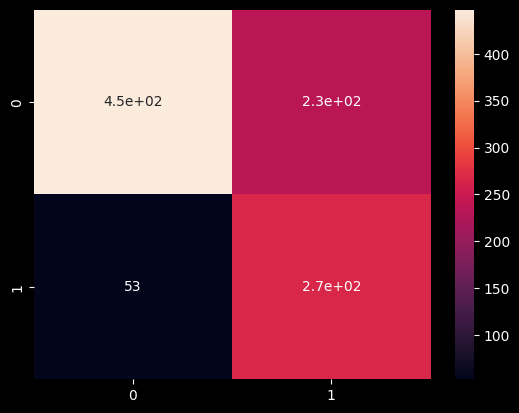

In [16]:
# Construído a matriz de confusão 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(previsoes, base_teste.classes)
sns.heatmap(cm, annot=True)
plt.show()